#Import library

In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

#import dataset

In [0]:
boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
Y=load_boston().target
X=load_boston().data

In [25]:
print(boston_data.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [27]:
boston_data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [0]:
#spliting the dataset
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

#standardize the dataset

In [8]:
type(data)

pandas.core.frame.DataFrame

In [0]:
# standardizing data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [31]:
type(x_train)

numpy.ndarray

In [0]:

#preparing training data for manual sgd regressor
manual_train=pd.DataFrame(data=x_train)
manual_train['price']=y_train

In [0]:
results=pd.DataFrame(columns=['sno', 'algo', 'alpha', 'lr_rate_variation', 'init_lr_rate', 'power_t', 'n_iter', 'error'])

#create regression function manual and sklearn SGDRegressor 

In [0]:

b_diff=[]
w_num=[]

x_test=np.array(x_test)
y_test=np.array(y_test)

In [37]:
# shape of test and train data matrix
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [0]:
import seaborn as sns
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## SKLearn Implement

Mean Squared Error : 18.8171511866595
Mean Absolute Error : 3.272210163170585


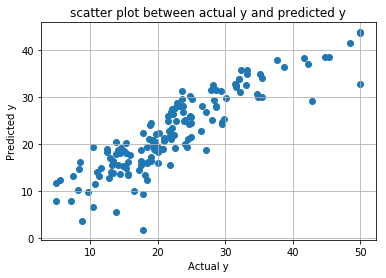

In [43]:
#use sklearn SGDRegressor and predict the price
#_________________________________________________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
# SkLearn SGD classifier
clf_ = SGDRegressor(penalty='none', max_iter=1000, learning_rate='constant' , eta0=0.001 )
clf_.fit(x_train, y_train)

print('Mean Squared Error :',mean_squared_error(y_test, clf_.predict(x_test)))
print('Mean Absolute Error :',mean_absolute_error(y_test, clf_.predict(x_test)))

plt.scatter(y_test,clf_.predict(x_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()



In [56]:
# SkLearn SGD classifier predicted weight matrix
sklearn_pred=clf_.predict(x_test)
sklearnsgd_w=clf_.coef_
sklearnsgd_w

array([-0.33126781,  0.93552815, -0.15323092,  0.56349977, -1.93510524,
        2.53426604,  0.03284748, -3.32954656,  1.89529266, -1.47365937,
       -2.01887324,  0.76173966, -4.02641953])

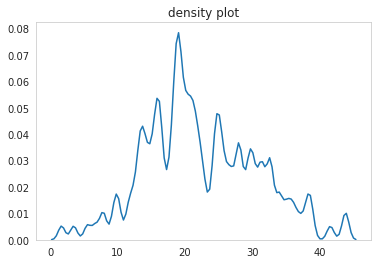

In [58]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(sklearn_pred), bw=0.5)

plt.grid()

plt.title('density plot')
plt.show()


Observation:  Most of predicted value occure between 10-30

## Manual implement SGD

In [0]:
#simple implementation of sgd to linear regression and predict the price
def CustomGradientDescentRegressor(train_data,learning_rate=0.001,n_itr=1000,k=10):
    w_cur=np.zeros(shape=(1,train_data.shape[1]-1))
    b_cur=0
    cur_itr=1
    while(cur_itr<=n_itr):
        w_old=w_cur
        b_old=b_cur
        w_temp=np.zeros(shape=(1,train_data.shape[1]-1))
        b_temp=0
        temp=train_data.sample(k)
        #print(temp.head(3))
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        for i in range(k):
            w_temp+=x[i]*(y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)
            b_temp+=(y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)
        w_cur=w_old-learning_rate*w_temp
        b_cur=b_old-learning_rate*b_temp
        if(w_old==w_cur).all():
            break
        cur_itr+=1
    return w_cur,b_cur
  
  
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)


def plot_(test_data,y_pred):
    #scatter plot
    plt.scatter(test_data,y_pred)
    plt.grid()
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.show() 

26.439364061222363
3.8058660450981563


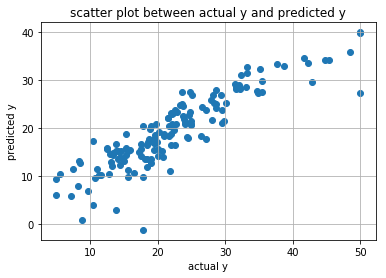

In [49]:
# sgd at -------->>>>>>earning_rate=0.001,n_itr=1000

w,b=CustomGradientDescentRegressor(manual_train,learning_rate=0.001,n_itr=1000)
y_pred=predict(x_test,w,b)

# Errors in implemeted model
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
plot_(y_test,y_pred)

In [50]:
# weight vector obtained from impemented SGD Classifier
custom_w=w
custom_w

array([[-0.20538702,  0.38902364, -0.55326891,  0.76299991, -0.58427362,
         2.99423469, -0.13707106, -1.55971412,  0.47885093, -0.51468098,
        -1.79504528,  0.71199287, -2.96725157]])

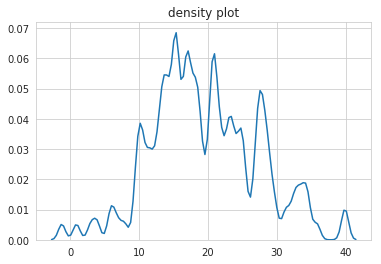

In [59]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred), bw=0.5)
plt.title('density plot')
plt.show()

#Comparing the model

In [52]:
from prettytable import PrettyTable

x=PrettyTable()
x.field_names=['Model','MSE','MAE']
x.add_row(['sklearn',mean_squared_error(y_test, clf_.predict(x_test)),mean_absolute_error(y_test, clf_.predict(x_test))])
x.add_row(['custom implement',mean_squared_error(y_test,y_pred),(mean_absolute_error(y_test,y_pred))])
print(x)

with open('Compare_error', 'w') as w:
    w.write(str(x))

+------------------+--------------------+--------------------+
|      Model       |        MSE         |        MAE         |
+------------------+--------------------+--------------------+
|     sklearn      |  18.8171511866595  | 3.272210163170585  |
| custom implement | 26.439364061222363 | 3.8058660450981563 |
+------------------+--------------------+--------------------+


In [54]:
# Top 10 predicted value
implemented_pred=y_pred

x=PrettyTable()
x.field_names=['SKLearn SGD predicted value','Implemented SGD predicted value']
for a in range(15):
    x.add_row([sklearn_pred[a],implemented_pred[a]])
print(x)   

with open('Top 10 predict', 'w') as w:
    w.write(str(x))

+-----------------------------+---------------------------------+
| SKLearn SGD predicted value | Implemented SGD predicted value |
+-----------------------------+---------------------------------+
|      24.833751842316218     |        20.99173483343341        |
|      16.27615116266962      |        17.08149886655334        |
|      18.047033389275864     |        15.766987964706097       |
|      19.03534771783375      |        15.40201503388248        |
|      13.404247330092609     |        9.915907076509074        |
|      17.898283606611766     |        15.150177535272183       |
|       6.68287788567619      |         3.91138775832054        |
|      26.471046220223883     |        23.09107245140476        |
|      28.036320315777225     |        25.004524351361713       |
|      18.649938038811193     |        17.83158862953246        |
|      19.19578673317879      |        15.256087055819584       |
|      29.944191714388694     |        25.291951900840747       |
|      22.

Observation:  

Top 10 predicted value shown in above table

Mean absolute error of Custom implement is greater than SKLearn sgd predicted

Mean squire error of custom implement is greater than SKLearn implement

there need of parameter tuning of Manual implement to improve performance